# <h1><center>Gravitational-Wave Explorer: A Beginner's Guide–Notebook 1 </center><h1>


#Notebook 1 of 3

Authors: Bradlee Tejeda$^{1}$, Rachel Langgin$^{2}$

$^{1}$Las Vegas Academy of the Arts \

$^{2}$University of Nevada, Las Vegas

##Project Overview

This 3-part interactive notebook series is designed to introduce high school students to the physics behind gravitational waves, using accessible explanations, engaging code, and real astronomical data. By building from basic Newtonian mechanics to the more abstract concepts of curved spacetime and gravitational radiation, students will gain an intuitive understanding of how black holes collide and how we detect their cosmic ripples on Earth.

##What You’ll Learn

	•	The meaning of mass and radius, and why they matter in space
	•	How objects move through three-dimensional flat space using vectors
	•	How mass warps 3D space, introducing the idea of curvature
	•	The difference between linear and angular momentum
	•	What gravitational force is, and how it’s related to motion
	•	An introduction to four-dimensional spacetime
	•	How these concepts come together to explain gravitational waves
	•	How we detect real binary black hole mergers, like GW150914

**Goal**: Describe a black hole only using physics concepts that high school students would be familiar with ([The basic physics of the binary black hole merger GW150914](https://arxiv.org/abs/1608.01940)). **All of this is to be understood so that we can study Gravitational-Waves (GWs) emissions from compact object binary mergers.**

##Notebook 1: Setting the Stage

In this first notebook, we focus on building the conceptual and physical groundwork needed to understand gravitational-wave physics. We’ll walk through:

	•	What mass and radius mean in space
	•	3D space and how particles move through it
	•	How mass bends space — introducing curvature
	•	Linear and angular momentum
	•	The basics of gravity and Newton’s law
	•	Intro to 4D spacetime and why it’s important


Below is a code cell to import different Python coding packages. These packages are pre-written libraries that we import into our notebook:

*   [Pandas](https://pandas.pydata.org/docs/user_guide/index.html): provides $\texttt{series}$ and $\texttt{DataFrames}$ for handling large amounts of data.

*   [numpy](https://numpy.org/doc/stable/user/index.html): is the fundamental package for scientific computing in Python, providing a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays.

*   [Matplotlib](https://matplotlib.org/stable/users/index): graphs your data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.).

**It is useful to import all the libraries you may want at the start of your coding session.**

Now, to run a code cell, simply click on it and press 'shift+enter' or press the play button on the top left of the code cell.

We customarily import as:

In [22]:
# Import libraries that help us work with data and make graphs
import pandas as pd  # Helps organize and analyze data in table form
import numpy as np  # Useful for doing math with large arrays of numbers
import matplotlib.pyplot as plt  # Allows us to create 2D graphs and plots

# These are special tools to help us make 3D plots
from mpl_toolkits.mplot3d import Axes3D  # Lets us create 3D visualizations

# These allow us to make our graphs interactive, like sliders you can move
from ipywidgets import interact, FloatSlider  # Adds sliders and other widgets to make things dynamic
from matplotlib.widgets import Slider  # Another type of slider used in matplotlib (for more precise control)

# This helps display animations and HTML content in Jupyter notebooks
from IPython.display import HTML

# Astropy is a library made for astronomy. This part gives us access to useful physical constants
import astropy.constants as const  # Gives us values like the speed of light, gravitational constant, etc.
from astropy.constants import M_sun, R_sun
import astropy.units as u  # Lets us label numbers with scientific units (like meters or seconds)

# This lets us create animations, such as moving graphs or changing waves
from matplotlib.animation import FuncAnimation  # Used to animate our plots to show how things change over time

This should connect your Google Colab notebook to a Python 3 Jupyter Lab environment, meaning our coding libraries now exist in our notebook.

There should now be a green check mark next to the code cell, another towards the top right of your screen displaying the RAM and Disk usage, and one at the bottom of your screen displaying how long it took to run the code.

In our three-dimensional world, specifically in astronomy, objects move in space plus another dimension of time–or “spacetime” as described by Einstein’s Theory of General Relativity (GR). Einstein envisioned gravity as a curving of spacetime by mass. Over 100 years ago, he predicted that very dense, massive objects, such as black holes or neutron stars, could gravitationally interact with the fabric of spacetime.

Let's describe these black holes through code!

In [2]:
"""This is called a comment.
We use triple quotation marks like this to describe sections of code—kind of like a heading or a note to the reader.
These are usually placed at the top of a cell to explain what it’s doing."""

# We can also write comments like this using the hashtag symbol.
# These are single-line comments. The computer skips over them when running the code.

print('This notebook should be well commented for students to follow along and naturally pick up on coding skills.')
# This is a print statement.
# It tells the computer to show a message on the screen.
# In this case, it will print the sentence inside the quotation marks.

This notebook should be well commented for students to follow along and naturally pick up on coding skills.


In [3]:
# Function to generate and display a binary black hole system in 3D
def plot_black_holes(R1):
    """
    This function creates a 3D model of two black holes orbiting together (called a binary system).
    You give the size of the first black hole (R1), and the second one is automatically set to half that size (R2).
    The plot lets you interact with it by adjusting the size of the black holes using a slider.
    """

    plt.close('all')  # Closes any previous plots so we don’t get a bunch of windows popping up

    fig = plt.figure(figsize=(5, 5))  # Sets up the "canvas" where our 3D plot will be drawn
    ax = fig.add_subplot(111, projection='3d')  # Adds a 3D plotting space (called an axis) to the figure

    R2 = 0.5 * R1  # Set the radius of the second black hole to be half of the first one

    # These are angles used to draw circles and spheres using math
    u = np.linspace(0, 2 * np.pi, 100)  # Angle that wraps around a full circle (0 to 2π)
    v = np.linspace(0, np.pi, 50)       # Angle from top to bottom of the sphere (0 to π)

    # Making the surface points for black hole 1 using spherical coordinates
    x1 = np.outer(np.cos(u), np.sin(v)) * R1  # X positions for black hole 1
    y1 = np.outer(np.sin(u), np.sin(v)) * R1  # Y positions for black hole 1
    z1 = np.outer(np.ones(np.size(u)), np.cos(v)) * R1  # Z positions for black hole 1

    # Making the surface points for black hole 2, shifted a bit to the right
    x2 = np.outer(np.cos(u), np.sin(v)) * R2 + 2 * R1  # X positions for black hole 2 (shifted)
    y2 = np.outer(np.sin(u), np.sin(v)) * R2           # Y positions for black hole 2
    z2 = np.outer(np.ones(np.size(u)), np.cos(v)) * R2 # Z positions for black hole 2

    # Now we actually draw the two black holes as smooth black spheres
    ax.plot_surface(x1, y1, z1, color='black', rstride=1, cstride=1, alpha=0.95, shade=True)  # Draw black hole 1
    ax.plot_surface(x2, y2, z2, color='black', rstride=1, cstride=1, alpha=0.95, shade=True)  # Draw black hole 2

    # Labeling the 3D plot axes so users know what they're looking at
    ax.set_xlabel("X Coordinate")  # Label for the X-axis
    ax.set_ylabel("Y Coordinate")  # Label for the Y-axis
    ax.set_zlabel("Z Coordinate")  # Label for the Z-axis
    ax.set_title(f"Binary Black Hole System (R1={R1}, R2={R2})")  # Adds a title showing the size of each black hole

    # Sets the shape and proportions of the 3D plot box so everything looks balanced
    ax.set_box_aspect(aspect=[1.5, 1, 1], zoom=0.8)  # Makes the plot wider along X, and zooms out a bit

    plt.show()  # Finally, show the 3D plot on screen

# This line below creates a slider that lets us change R1 (the size of black hole 1) in real time.
# The black hole sizes update live on the plot when you move the slider.
interact(plot_black_holes, R1=(1, 10, 0.5))  # R1 goes from 1 to 10, changing by 0.5 each time

interactive(children=(FloatSlider(value=5.0, description='R1', max=10.0, min=1.0, step=0.5), Output()), _dom_c…

<function __main__.plot_black_holes(R1)>

**Question 1**: What did we just plot? We can describe the code we are writing through what is known as $\texttt{pseudocode}$, a way to describe how a program or algorithm should work, using everyday language instead of a specific programming language.

<u>Write your own pseudocode below describing the plot_black_holes function<u>:

Student Answer 1: Fill in the rest of the pseudocode below.
```
Function plot_black_holes(R1):
    Input: R1 (radius of the first black hole)
    Output: A 3D visualization of a binary black hole system

.                   .
. Fill in the blank .
.                   .

Call the function using an interactive slider:
    - Allow the user to change R1 dynamically using a slider ranging from 1 to 10 with a step size of 0.5.

```

Student Answer 1 Example:

In [4]:
# This is pseudocode, which means it's a human-readable version of how a function works.
# It's not meant to be run directly as Python code, but it helps you understand the structure before coding it.

'''Function plot_black_holes(R1):
    Input: R1 (radius of the first black hole)
    Output: A 3D visualization of a binary black hole system

    1. Close all existing plots to keep the screen clean before drawing a new one.

    2. Create a new 3D plot using Matplotlib’s 3D toolkit.

    3. Define R2 as half the size of R1 (this gives us two black holes of different sizes).

    4. Set up the spherical grid for creating the surface of the black holes:
       a. Generate azimuthal angles (u) going from 0 to 2π — this wraps around in a circle.
       b. Generate polar angles (v) going from 0 to π — this goes from the top to the bottom of the sphere.

    5. Use these angles to compute the x, y, and z coordinates (3D positions) for the first black hole.

    6. Do the same for the second black hole, but shift it along the x-axis so it doesn’t overlap the first.

    7. Plot both black holes using these coordinates:
       a. Color them black, make them a bit transparent using alpha, and turn on smooth shading.

    8. Add labels for the X, Y, and Z axes so the viewer knows which direction is which.

    9. Adjust the plot’s aspect ratio so the black holes don’t look stretched or squished.

    10. Finally, display the 3D plot on screen.

Call the function with an interactive slider:
    - Let the user change the size (R1) of the first black hole with a slider from 1 to 10, moving in steps of 0.5.
'''

'Function plot_black_holes(R1):\n    Input: R1 (radius of the first black hole)\n    Output: A 3D visualization of a binary black hole system\n\n    1. Close all existing plots to keep the screen clean before drawing a new one.\n\n    2. Create a new 3D plot using Matplotlib’s 3D toolkit.\n\n    3. Define R2 as half the size of R1 (this gives us two black holes of different sizes).\n\n    4. Set up the spherical grid for creating the surface of the black holes:\n       a. Generate azimuthal angles (u) going from 0 to 2π — this wraps around in a circle.\n       b. Generate polar angles (v) going from 0 to π — this goes from the top to the bottom of the sphere.\n\n    5. Use these angles to compute the x, y, and z coordinates (3D positions) for the first black hole.\n\n    6. Do the same for the second black hole, but shift it along the x-axis so it doesn’t overlap the first.\n\n    7. Plot both black holes using these coordinates:\n       a. Color them black, make them a bit transparent

Now, we want our code to be physically accurate and representative of real black hole properties. We use the functions below to plot a black hole with a Schwarzchild radius, which depends on the gravitational force and mass. This radius defines what is known as the "event horizon", the location where particles of light called photons can no longer escape from the black hole's gravitational pull.   

In [31]:
"""
# Binary Black Hole Visualization: Part 1

## Overview
This Python script introduces a 3D model of a binary black hole system.
You'll be able to adjust the radius of one black hole and see how it changes the system’s structure.
This activity helps explain important ideas in astrophysics like the Schwarzschild radius and the concept of mass ratio.

### Concepts We'll Explore:

- **Schwarzschild Radius (r_s)**:
  This is the "point of no return" — the edge of a black hole. If anything crosses this distance, it can't escape.
  The formula is:

  r_s = 2GM/c^2

  Where:
    - G is the gravitational constant (6.674 × 10^-11 m^3/kg/s^2)
    - M is the mass of the black hole
    - c is the speed of light (3.0 × 10^8 m/s)

- **Mass Ratio (q)**:
  This tells us how two black holes compare in size. It’s important when looking at the kind of gravitational waves they produce:

  q = M_2/M_1

  where (M_1) is the larger mass and (M_2) is the smaller.
"""

# Import physical constants like G (gravity), c (speed of light), and solar mass from scipy.constants
from scipy import constants as const

# Define a function that calculates the Schwarzschild radius given a black hole mass
def schwarzschild_radius(M):
    """
    Returns the Schwarzschild radius based on mass in solar masses.

    Formula: r_s = (2 * G * M) / c^2

    - M: mass of the black hole in solar masses
    """

    G = const.G                  # Gravitational constant, units m^3 kg^-1 s^-2
    c = const.c                  # Speed of light, units meters per second (m/s)
    M_kg = M * M_sun       # Convert input mass from solar masses to kilograms

    # Calculate Schwarzschild radius using formula and return the result (in meters)
    return (2 * G * M_kg) / (c ** 2)

# Define a function to calculate the mass ratio of two black holes
def mass_ratio(M1, M2):
    """
    Calculates the mass ratio q = M2 / M1.

    - M1: mass of the larger black hole
    - M2: mass of the smaller black hole
    """

    # Return ratio of smaller mass over larger mass, always ≤ 1
    return M2 / M1

Let's test out our functions.

**Question 2:** For a 10 solar mass black hole, at what distance is the "event horizon"? Write your answer in a full sentence using a print statement.

In [6]:
# Hint: Use the schwarzschild_radius function defined earlier to calculate the radius for a given mass

# Fill in the print statement below to show the Schwarzschild radius for a specific black hole mass
print()  # TO-DO: Inside the parentheses, call schwarzschild_radius with a mass value and print the result

<details>
print('For a 10 solar mass black hole, the event horizon is defined by the Schwarzchild radius at ~', round(schwarzschild_radius(10), 2))
</details>

**Question 3**: For a binary black hole system made up of a 12 solar mass primary black hole and a 8 solar mass secondary black hole, what is a the mass ratio?

In [7]:
# Hint: Use the mass_ratio function defined earlier to calculate the ratio of two black hole masses

# Fill in the print statement below to display the mass ratio of two black holes
print()  # TO-DO: Inside the parentheses, call mass_ratio with two mass values and print the result

<details>
print('A binary black system with a primary mass of 12 solar masses and a secondary mass of 8 solar masses has a mass ratio of ~', round(mass_ratio(12, 8), 2))
</details>

Let's redefine the plotting function from above utizing our Schwarzchild radius function so that it is physically accurate.

In [30]:
def plot_black_holes(M1, M2_ratio=0.5):
    # Define a function to plot two black holes given mass of first and ratio for second

    """
    Generates and visualizes a binary black hole system in 3D using their Schwarzschild radii.

    Parameters:
    - M1: Mass of the first black hole in solar masses
    - M2_ratio: Mass ratio of the second black hole relative to M1 (default is 0.5)
    """
    plt.close('all')
    # Close any existing figures to keep the notebook clean and avoid overlapping plots

    fig = plt.figure(figsize=(5, 5))
    # Create a new figure window with size 5 by 5 inches

    ax = fig.add_subplot(111, projection='3d')
    # Add a 3D subplot to the figure for 3D plotting

    M2 = M1 * M2_ratio
    # Calculate the mass of the second black hole as a fraction of the first black hole's mass

    R1 = schwarzschild_radius(M1)
    # Compute the Schwarzschild radius (event horizon size) for the first black hole

    R2 = schwarzschild_radius(M2)
    # Compute the Schwarzschild radius for the second black hole

    separation = 10 * (R1 + R2)
    # Set the distance between the two black holes to 10 times the sum of their radii for visibility

    u = np.linspace(0, 2 * np.pi, 100)
    # Create an array of 100 evenly spaced values from 0 to 2π (azimuthal angle)

    v = np.linspace(0, np.pi, 50)
    # Create an array of 50 evenly spaced values from 0 to π (polar angle)

    x1 = np.outer(np.cos(u), np.sin(v)) * R1
    # Calculate the x-coordinates of points on the surface of the first black hole sphere

    y1 = np.outer(np.sin(u), np.sin(v)) * R1
    # Calculate the y-coordinates of points on the surface of the first black hole sphere

    z1 = np.outer(np.ones(np.size(u)), np.cos(v)) * R1
    # Calculate the z-coordinates of points on the surface of the first black hole sphere

    x2 = np.outer(np.cos(u), np.sin(v)) * R2 + separation
    # Calculate the x-coordinates of points on the second black hole sphere, shifted along x by separation

    y2 = np.outer(np.sin(u), np.sin(v)) * R2
    # Calculate the y-coordinates of points on the second black hole sphere

    z2 = np.outer(np.ones(np.size(u)), np.cos(v)) * R2
    # Calculate the z-coordinates of points on the second black hole sphere

    ax.plot_surface(x1, y1, z1, color='black', alpha=0.95, shade=True)
    # Draw the surface of the first black hole as a black, slightly transparent sphere

    ax.plot_surface(x2, y2, z2, color='black', alpha=0.95, shade=True)
    # Draw the surface of the second black hole similarly

    ax.set_xlabel("X Coordinate (m)")
    # Label the x-axis with units of meters

    ax.set_ylabel("Y Coordinate (m)")
    # Label the y-axis with units of meters

    ax.set_zlabel("Z Coordinate (m)")
    # Label the z-axis with units of meters

    ax.set_title(rf"Binary Black Hole System (M1={M1}M$_\odot$, M2={M2:.2f}M$_\odot$)")
    # Add a title showing the masses of the two black holes, formatted to 2 decimals for M2

    ax.set_box_aspect(aspect=([1.5,1,1]), zoom=.9)
    # Set equal aspect ratio for all axes and zoom out slightly for better viewing angle

    plt.show()
    # Render and display the final 3D plot to the output

# Create interactive sliders for the function inputs:
# M1 can be varied from 1 to 50 in steps of 1 solar mass
# M2_ratio can be varied from 0.1 to 1.0 in steps of 0.1 (ratio of M2 to M1)
interact(plot_black_holes, M1=(1, 50, 1), M2_ratio=(0.1, 1.0, 0.1))

interactive(children=(IntSlider(value=25, description='M1', max=50, min=1), FloatSlider(value=0.5, description…

<function __main__.plot_black_holes(M1, M2_ratio=0.5)>

**Question 4 of 10:**

Using the updated plot_black_holes function, what will be the Schwarzschild radii and separation distance for a binary black hole system where:

	•	The primary black hole has a mass of 20 solar masses
	•	The mass ratio of the secondary black hole is 0.3

In [11]:
# Print a descriptive message about the scenario we're calculating
print('For a 20 solar mass primary black hole and a secondary black hole with a mass ratio of 0.3, the Schwarzschild radii are:')

# Calculate and print the Schwarzschild radius for the primary black hole (20 solar masses), rounded to 2 decimal places
print(f'R1 ~ {round(schwarzschild_radius(20), 2)}')

# Calculate and print the Schwarzschild radius for the secondary black hole (mass ratio 0.3 of 20 solar masses), rounded to 2 decimals
print(f'R2 ~ {round(schwarzschild_radius(20 * 0.3), 2)}')

# Calculate and print the separation distance between the two black holes (10 times sum of their radii), rounded to 2 decimals
print(f'Separation ~ {round(10 * (schwarzschild_radius(20) + schwarzschild_radius(20 * 0.3)), 2)}')

For a 20 solar mass primary black hole and a secondary black hole with a mass ratio of 0.3, the Schwarzschild radii are:
R1 ~ 59065.0 kg
R2 ~ 17719.5 kg
Separation ~ 767845.02 kg


<details Answer:>
print('For a 20 solar mass primary black hole and a secondary black hole with a mass ratio of 0.3, the Schwarzschild radii are:')
print(f'R1 ~ {round(schwarzschild_radius(20), 2)}')
print(f'R2 ~ {round(schwarzschild_radius(20 * 0.3), 2)}')
print(f'Separation ~ {round(10 * (schwarzschild_radius(20) + schwarzschild_radius(20 * 0.3)), 2)}')

The **universe** isn’t just an empty void—it has **structure**. Think of **space** and **time** as part of a **four-dimensional fabric** that everything in the cosmos exists within. This **‘fabric’** isn’t rigid; it **bends** and **stretches** in response to **mass** and **energy**. This concept, known as spacetime, is the foundation of **Einstein’s theory of General Relativity**.

To **visualize spacetime**, we can plot a **simplified version** of it using a **mesh grid**. This grid represents **flat space**—an undistorted region of spacetime before any **massive objects**, like **stars** or **black holes**, cause it to curve. Using **Matplotlib’s meshgrid function**, we can create a **3D wireframe** that represents this **flat spacetim**e, allowing us to better understand how it behaves before introducing **gravitational influences**.

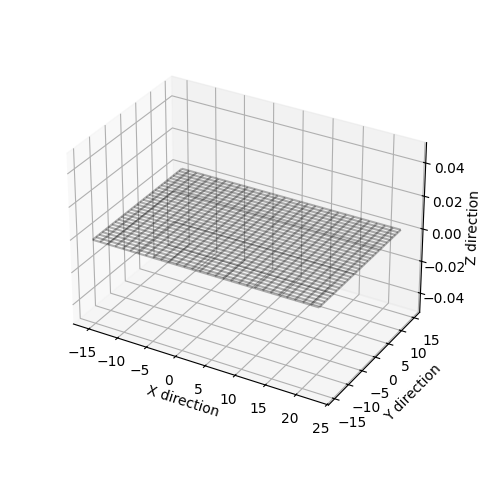

In [14]:
# Define radii of the two spheres representing black holes or objects
R1 = 10  # Radius of the larger sphere
R2 = 0.5 * R1  # Radius of the smaller sphere, half the size of the larger one

# Create a new matplotlib figure with a specified size (width=10, height=6 inches)
fig = plt.figure(figsize=(10, 6))

# Add a 3D subplot to the figure to enable 3D plotting
ax = fig.add_subplot(projection='3d')

# Create 2D grids for X and Y coordinates over specified ranges to form the base plane
X, Y = np.meshgrid(
    np.linspace(-1.5 * R1, 1.5 * (R1 + R2), 30),  # X coordinates from -1.5*R1 to 1.5*(R1+R2), 30 points
    np.linspace(-1.5 * R1, 1.5 * R1, 30)           # Y coordinates from -1.5*R1 to 1.5*R1, 30 points
)

# Create a flat Z plane at zero height, same shape as X and Y grids
Z = np.zeros_like(X)  # Z-coordinates set to zero for flat plane

# Plot the wireframe grid on the flat plane with black lines and light transparency
ax.plot_wireframe(X, Y, Z, color='black', alpha=0.3)

# Label the X-axis of the plot as 'X direction'
ax.set_xlabel('X direction')

# Label the Y-axis of the plot as 'Y direction'
ax.set_ylabel('Y direction')

# Label the Z-axis of the plot as 'Z direction'
ax.set_zlabel('Z direction')

# Set equal aspect ratio for the 3D plot to keep proportions consistent
ax.set_box_aspect([1.5, 1, 1], zoom=.85)  # Ratio corresponds to the relative lengths of X, Y, and Z axes

# Display the final plot with the wireframe grid and axis labels
plt.show()

# *But spacetime isn’t always flat. When massive objects exist, they create ‘dents’ in this fabric. Let’s see how introducing mass affects the grid.*

To represent where the black holes reside, we can modify the wireframe to dip near the centers of the spheres. This can be achieved by modeling the **gravitational potential well** as:  

$
\Phi(x, y) = -\frac{GM_1}{\sqrt{(x - x_1)^2 + y^2 + z^2}} - \frac{GM_2}{\sqrt{(x - x_2)^2 + y^2 + z^2}}$

Since we're interested in visualizing the wells in a **2D wireframe representation**, we can plot a deformation of flat space where the depth of the grid is proportional to the gravitational potential at each point.

- **Spheres** represent the black holes.
- **Wireframe** is modified to show a **gravitational potential well**:
  - The depth is proportional to $-\Phi(x, y)$, following an inverse square root law.
  - The grid "dips" where the black holes are located, mimicking the warping of space.
- **Normalization** is applied to make visualization clearer.

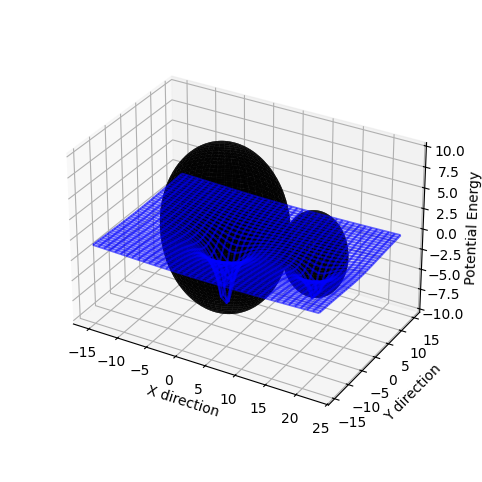

In [17]:
# Define constants for the simulation
G = 1  # Gravitational constant in arbitrary units for simplicity
M1 = 10  # Mass of the larger black hole
M2 = 5   # Mass of the smaller black hole

# Define radii and positions of the black holes
R1 = 10  # Radius of the large black hole
R2 = 0.5 * R1  # Radius of the smaller black hole (half of the large one)
x1, y1 = 0, 0  # Coordinates of the large black hole (centered at origin)
x2, y2 = R1 + R2, 0  # Coordinates of the smaller black hole, offset along x-axis by sum of radii

# Create a new figure with specific size for 3D plotting
fig = plt.figure(figsize=(10, 6))

# Add a 3D subplot to the figure for plotting 3D objects
ax = fig.add_subplot(projection='3d')

# Create mesh grids for spherical coordinates (angles) for smooth sphere surfaces
u = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle from 0 to 2π (circle around z-axis)
v = np.linspace(0, np.pi, 100)      # Polar angle from 0 to π (from top to bottom)

# Calculate Cartesian coordinates for the large sphere (centered at origin)
x_sphere1 = R1 * np.outer(np.cos(u), np.sin(v))  # X coordinates of large sphere surface
y_sphere1 = R1 * np.outer(np.sin(u), np.sin(v))  # Y coordinates of large sphere surface
z_sphere1 = R1 * np.outer(np.ones(np.size(u)), np.cos(v))  # Z coordinates of large sphere surface

# Calculate Cartesian coordinates for the smaller sphere (offset by x2)
x_sphere2 = R2 * np.outer(np.cos(u), np.sin(v)) + x2  # X coordinates of small sphere shifted by x2
y_sphere2 = R2 * np.outer(np.sin(u), np.sin(v))       # Y coordinates of small sphere surface
z_sphere2 = R2 * np.outer(np.ones(np.size(u)), np.cos(v))  # Z coordinates of small sphere surface

# Create 2D grids for X and Y over a range covering both black holes and surrounding space
X, Y = np.meshgrid(
    np.linspace(-1.5 * R1, 1.5 * (R1 + R2), 40),  # X values from -1.5*R1 to 1.5*(R1+R2), 40 points
    np.linspace(-1.5 * R1, 1.5 * R1, 40)          # Y values from -1.5*R1 to 1.5*R1, 40 points
)

# Calculate gravitational potential at each (X, Y) point on the grid
# Adding 1 inside sqrt to avoid division by zero and smooth the potential well
Z = -G * (M1 / np.sqrt((X - x1)**2 + Y**2 + 1) + M2 / np.sqrt((X - x2)**2 + Y**2 + 1))

# Normalize or scale the depth of the gravitational potential well (currently set to 1)
Z *= 1

# Plot the wireframe surface representing the gravitational potential well
ax.plot_wireframe(X, Y, Z, color='blue', alpha=0.6)

# Plot the large black hole as a solid black sphere
ax.plot_surface(x_sphere1, y_sphere1, z_sphere1, color='black', alpha=0.9)

# Plot the smaller black hole as a solid black sphere, offset appropriately
ax.plot_surface(x_sphere2, y_sphere2, z_sphere2, color='black', alpha=0.9)

# Label the X-axis with 'X direction'
ax.set_xlabel('X direction')

# Label the Y-axis with 'Y direction'
ax.set_ylabel('Y direction')

# Label the Z-axis to represent potential energy (gravitational potential well)
ax.set_zlabel('Potential Energy')

# Set the 3D plot’s aspect ratio to keep axes proportional (1.5:1:1)
ax.set_box_aspect([1.5, 1, 1], zoom=.85)  # Maintains correct spatial proportions

# Show the final 3D plot with black holes and gravitational potential
plt.show()

To visualize gravitational effects from multiple perspectives, we combine two complementary views.

- The 3D potential well plot above models the gravitational potential from two black holes, showing how mass warps space and affects potential energy landscapes.
- In parallel, the 2D vector field below illustrates how test particles might accelerate under a position-dependent force field—mimicking a bird’s-eye view of spacetime curvature or flow lines.

Together, these plots offer both surface-level and depth-oriented insights into how gravitational fields shape motion and geometry.

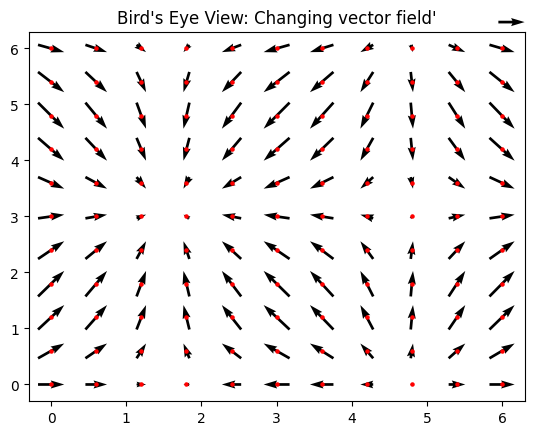

In [18]:
# Create a figure and axis object for plotting 2D graphs
fig2, ax2 = plt.subplots()

# Generate a 2D grid of X and Y values from 0 to 2π with steps of 0.2 for the vector field
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, 0.2), np.arange(0, 2 * np.pi, 0.2))

# Define the horizontal component (U) of the vectors at each grid point using cosine of X
U = np.cos(X)

# Define the vertical component (V) of the vectors at each grid point using sine of Y
V = np.sin(Y)

# Set the title of the plot to describe what is being shown
ax2.set_title("Bird's Eye View: Changing vector field'")

# Create a quiver plot (arrows representing vectors) on the grid:
# - X[::3, ::3] and Y[::3, ::3] subsample the grid points by every 3rd to reduce clutter
# - U[::3, ::3] and V[::3, ::3] are corresponding vector components at those points
# - pivot='mid' centers the arrow on the grid point
# - units='inches' scales arrow length relative to figure inches for consistent size
Q = ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')

# Add a quiver key (legend) to the plot showing arrow length scale:
# - Position it at 90% width and height of the figure (top right corner)
# - Label shows a vector magnitude of 1 meter per second (m/s)
qk = ax2.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$',
                   labelpos='E', coordinates='figure')

# Overlay red dots on the vector origins for better visual reference
# - Same subsampling to match the quiver arrows
ax2.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

# Display the final plot
# In interactive environments like notebooks this may not be required,
# but is necessary in scripts to render the plot window
plt.show()

Building on our visual exploration of gravitational fields and potentials, we now introduce a quantitative tool to calculate the orbital frequency of a black hole binary. Using Kepler’s Third Law, this function captures how mass and separation govern orbital motion—key to understanding the dynamics that give rise to gravitational waves. While the vector and potential plots provide spatial intuition, this function lets us compute the actual motion driving those fields.

In [28]:
# Define a function to calculate the orbital frequency of two black holes orbiting each other in a circular path
def orbital_frequency(M, r):
    """
    Calculate the orbital frequency (omega; angular velocity) of two black holes using Kepler's Third Law.

    Formula: omega = sqrt(G * M / r^3)

    Parameters:
      - M: mass of the larger black hole (in solar masses)
      - r: separation distance between the black holes (in solar radii)

    Returns:
      - omega: orbital frequency in radians per second
    """

    # Convert mass from solar masses to kilograms using the constant for the Sun's mass
    M = M_sun * M

    # Convert distance from solar radii to meters using the constant for the Sun's radius
    r = const.R_sun * r

    # Gravitational constant in m^3 kg^-1 s^-2
    G = const.G

    # Calculate the orbital frequency omega = sqrt(G*M/r^3)
    omega = np.sqrt(G * M / r**3)

    # Return the computed orbital frequency
    return omega

In [24]:
# Example values for two black holes, each with 30 solar masses
M = 30  # Mass of each black hole in units of the Sun's mass

# Distance between the two black holes, set to 10 times the radius of the Sun
r = 10  # Separation distance in solar radii

# Calculate the orbital angular frequency (radians per second) using the orbital_frequency function
omega = orbital_frequency(M, r)  # This calls the function defined earlier

# Convert angular frequency (radians per second) to orbital frequency in Hertz (cycles per second)
f_orb = omega / (2 * np.pi)  # Dividing by 2π converts from angular frequency to cycles per second

# Print the orbital angular frequency in scientific notation with 2 decimal places
print(f"Orbital angular frequency: {omega:.2e} rad/s")

# Print the orbital frequency in Hertz (cycles per second) in scientific notation with 2 decimal places
print(f"Orbital frequency: {f_orb:.2e} Hz")

Orbital angular frequency: 1.09e-04 1 / s rad/s
Orbital frequency: 1.73e-05 1 / s Hz


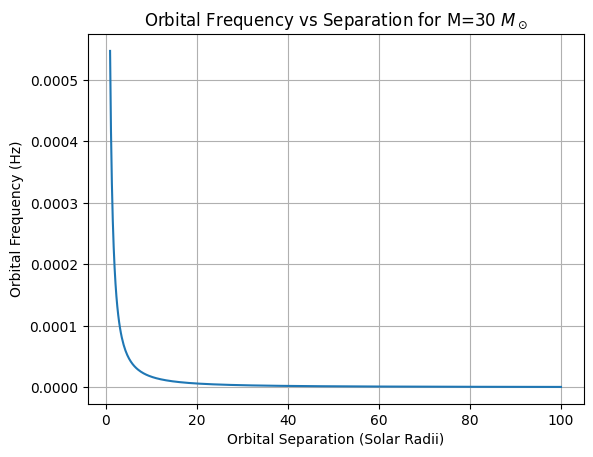

In [27]:
# Create an array of orbital separations from 1 to 100 solar radii with 500 points evenly spaced
radii = np.linspace(1, 100, 500)  # Orbital separations in units of the Sun’s radius

# Fix the mass of the black hole(s) at 30 solar masses for this plot
M_fixed = 30  # Mass in solar masses

# Calculate orbital frequencies for all radii values (orbital_frequency returns angular frequency in rad/s)
# Divide by 2π to convert angular frequency to cycles per second (Hz)
frequencies = orbital_frequency(M_fixed, radii) / (2 * np.pi)  # Frequency in Hertz (Hz)

# Plot orbital separation on the x-axis vs orbital frequency on the y-axis
plt.plot(radii, frequencies)

# Label the x-axis as orbital separation measured in solar radii
plt.xlabel("Orbital Separation (Solar Radii)")

# Label the y-axis as orbital frequency measured in Hertz (cycles per second)
plt.ylabel("Orbital Frequency (Hz)")

# Add a title describing what the plot shows, including the fixed black hole mass
plt.title(rf"Orbital Frequency vs Separation for M={M_fixed} $M_\odot$")

# Enable grid lines for easier reading of the plot values
plt.grid(True)

# Display the plot on the screen
plt.show()

Having calculated the orbital frequency from mass and separation, we now bring those dynamics to life through an animation of a binary black hole system in circular orbit. This visualization connects abstract equations to physical motion, showing how gravitational interaction drives orbital trajectories—just as predicted by our earlier computations. It ties together mass, force, and motion into a dynamic, evolving picture.

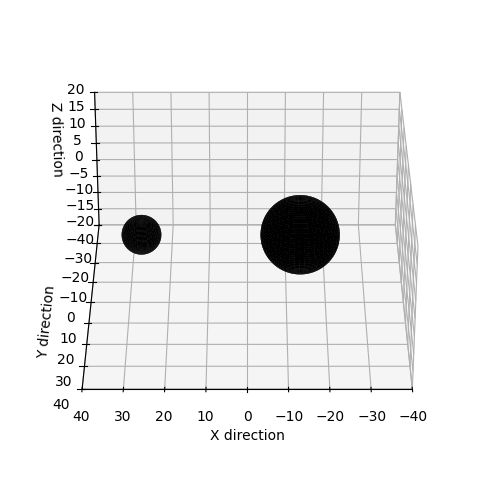

In [29]:
# Set mass of the larger black hole (arbitrary units)
M1 = 10

# Set mass of the smaller black hole
M2 = 5

# Calculate total combined mass of the system
total_mass = M1 + M2

# Set radius of the larger black hole
R1 = 10

# Set radius of the smaller black hole as half the radius of the larger one
R2 = 0.5 * R1

# Initial distance between centers of the two black holes
d0 = 40

# Minimum separation distance before the two black holes merge
d_min = R1 + R2

# Total number of frames to run before merger is complete
t_merge = 200

# Define a function that returns separation distance at frame t, modeling inspiral decay
def separation_decay(t):
    # Calculate remaining frames until merger, but don't go below zero
    remaining = max(0, t_merge - t)
    # Return separation distance with power-law decay to simulate inspiral
    return d_min + (d0 - d_min) * (remaining / t_merge)**0.25

# Generate 50 evenly spaced points from 0 to 2π for azimuthal angle u (sphere parameterization)
u = np.linspace(0, 2 * np.pi, 50)

# Generate 50 evenly spaced points from 0 to π for polar angle v (sphere parameterization)
v = np.linspace(0, np.pi, 50)

# Calculate x-coordinates of large black hole sphere surface
x_sphere1 = R1 * np.outer(np.cos(u), np.sin(v))

# Calculate y-coordinates of large black hole sphere surface
y_sphere1 = R1 * np.outer(np.sin(u), np.sin(v))

# Calculate z-coordinates of large black hole sphere surface
z_sphere1 = R1 * np.outer(np.ones_like(u), np.cos(v))

# Calculate x-coordinates of smaller black hole sphere surface
x_sphere2 = R2 * np.outer(np.cos(u), np.sin(v))

# Calculate y-coordinates of smaller black hole sphere surface
y_sphere2 = R2 * np.outer(np.sin(u), np.sin(v))

# Calculate z-coordinates of smaller black hole sphere surface
z_sphere2 = R2 * np.outer(np.ones_like(u), np.cos(v))

# Create a unit sphere mesh (radius=1) for merged black hole surface
x_sphere_merged = np.outer(np.cos(u), np.sin(v))
# x-coordinates of the unit sphere, used for scaling merged BH size

y_sphere_merged = np.outer(np.sin(u), np.sin(v))
# y-coordinates of the unit sphere, used for scaling merged BH size

z_sphere_merged = np.outer(np.ones_like(u), np.cos(v))
# z-coordinates of the unit sphere, used for scaling merged BH size

# Initialize a new matplotlib figure with size 10x6 inches
fig = plt.figure(figsize=(10, 6))

# Add a 3D subplot to the figure
ax = fig.add_subplot(projection='3d')

# Set the aspect ratio of the plot box to 1:1:0.5 for proper visualization proportions
ax.set_box_aspect([1, 1, 0.5])

# Set the 3D plot view: azimuth angle 90 degrees, elevation 30 degrees
ax.view_init(azim=90, elev=30)

# Define the update function for animation frames, taking current frame number as input
def update(frame):
    # Clear the axes for redrawing the new frame
    ax.cla()

    # Calculate the current black hole separation based on frame number
    d = separation_decay(frame)

    # Set x-axis limits to show the full initial separation range
    ax.set_xlim(-d0, d0)

    # Set y-axis limits to show the full initial separation range
    ax.set_ylim(-d0, d0)

    # Set z-axis limits to half the initial separation range (for better vertical scale)
    ax.set_zlim(-d0 / 2, d0 / 2)

    # Label the x-axis
    ax.set_xlabel("X direction")

    # Label the y-axis
    ax.set_ylabel("Y direction")

    # Label the z-axis
    ax.set_zlabel("Z direction")

    # Keep the plot box aspect ratio consistent
    ax.set_box_aspect([1, 1, 0.5])

    # Reset the view angle for each frame to keep consistent camera angle
    ax.view_init(azim=90, elev=30)

    # If the black holes are still inspiraling (separation larger than minimum)
    if d > d_min:
        # Calculate the orbital angle for this frame (frame * pi / 60 radians)
        angle = frame * np.pi / 60

        # Calculate orbital radius of the larger black hole relative to center of mass
        r1 = (M2 / total_mass) * d

        # Calculate orbital radius of the smaller black hole relative to center of mass
        r2 = (M1 / total_mass) * d

        # Calculate x position of the larger black hole in orbit
        x1 = -r1 * np.cos(angle)

        # Calculate y position of the larger black hole in orbit
        y1 = -r1 * np.sin(angle)

        # Calculate x position of the smaller black hole in orbit
        x2 = +r2 * np.cos(angle)

        # Calculate y position of the smaller black hole in orbit
        y2 = +r2 * np.sin(angle)

        # Draw the large black hole surface at its calculated orbit position
        ax.plot_surface(x_sphere1 + x1, y_sphere1 + y1, z_sphere1, color='black')

        # Draw the smaller black hole surface at its calculated orbit position
        ax.plot_surface(x_sphere2 + x2, y_sphere2 + y2, z_sphere2, color='black')

    else:
        # Begin merger phase when separation is minimal or less

        # Calculate progress of merger (from 0 to 1) scaled over 30 frames
        merge_progress = min(1, (frame - t_merge) / 30)

        # Calculate scaled radius of the larger black hole shrinking to zero
        R1_scaled = R1 * (1 - merge_progress)

        # Calculate scaled radius of the smaller black hole shrinking to zero
        R2_scaled = R2 * (1 - merge_progress)

        # Calculate radius of merged black hole growing from zero to combined size
        R_merged = (R1 + R2) * merge_progress

        # Calculate coordinates for scaled shrinking large black hole sphere
        x_s1 = R1_scaled * np.outer(np.cos(u), np.sin(v))  # Scale x-coords of large BH by current shrinking radius
        y_s1 = R1_scaled * np.outer(np.sin(u), np.sin(v))  # Scale y-coords of large BH by current shrinking radius
        z_s1 = R1_scaled * np.outer(np.ones_like(u), np.cos(v))  # Scale z-coords of large BH by current shrinking radius

        # Calculate coordinates for scaled shrinking small black hole sphere
        x_s2 = R2_scaled * np.outer(np.cos(u), np.sin(v))  # Scale x-coords of small BH by current shrinking radius
        y_s2 = R2_scaled * np.outer(np.sin(u), np.sin(v))  # Scale y-coords of small BH by current shrinking radius
        z_s2 = R2_scaled * np.outer(np.ones_like(u), np.cos(v))  # Scale z-coords of small BH by current shrinking radius

        # Calculate coordinates for scaled growing merged black hole sphere at origin
        x_m = R_merged * x_sphere_merged  # Scale x-coords of merged BH sphere by growing radius
        y_m = R_merged * y_sphere_merged  # Scale y-coords of merged BH sphere by growing radius
        z_m = R_merged * z_sphere_merged  # Scale z-coords of merged BH sphere by growing radius

        # Plot shrinking large black hole surface at origin (overlapping)
        ax.plot_surface(x_s1, y_s1, z_s1, color='black', alpha=1)

        # Plot shrinking small black hole surface at origin (overlapping)
        ax.plot_surface(x_s2, y_s2, z_s2, color='black', alpha=1)

        # Plot growing merged black hole surface on top with some transparency
        ax.plot_surface(x_m, y_m, z_m, color='black', alpha=0.8)

    # Return the axis object after drawing current frame (required by FuncAnimation)
    return ax,

# Create animation object that calls update function for each frame from 0 to t_merge + 50
ani = FuncAnimation(fig, update, frames=t_merge + 50, interval=50, blit=False)

# Display the animation as an HTML5 video inside the notebook
HTML(ani.to_html5_video())

When these objects eventually collide, they create ripples in spacetime that radiate outwards, known as Gravitational Waves (GWs)! These waves stretch and squeeze spacetime at the speed of light and encode information about their origins, such as the masses and dynamics of the objects that created them.

In September 2015, the two LIGO detectors recorded the first GW observation. These waves lasted less than 0.2 seconds and followed a steady inspiral, peak merger, and a quick ringdown that aligned with Einstein’s predictions. The source of the signal–GW150914–was the collision and merger of two black holes, each about 30 times the mass of the Sun, located about 1.3 billion light-years away.

### Discussion Questions:

1. What factors determine the orbital speed of each black hole in a binary system?
2. Why do the black holes spiral inward rather than orbit forever?
3. How does the mass ratio influence the position of the center of mass and orbit radii?

Try modifying the masses `M1` and `M2` in the code and observe the changes in the animation!

<details>  
<summary> Click to reveal student discussion answers</summary>  

### 1. What factors determine the orbital speed of each black hole in a binary system?

The orbital speed of each black hole is governed primarily by Newton’s law of universal gravitation and the conservation of angular momentum. Specifically, the masses of the two black holes and the distance between them are key. The gravitational force provides the centripetal force needed for orbit, so increasing the mass of either object or decreasing the distance between them results in higher orbital speeds. Additionally, the distribution of mass affects the relative velocities—more massive black holes tend to move slower than their lighter counterparts in a shared orbit. These relationships hold in Newtonian physics, but become even more intricate when relativistic effects are considered.

---

### 2. Why do the black holes spiral inward rather than orbit forever?

The inspiraling motion is a direct result of gravitational wave emission. As the black holes orbit one another, they disturb the curvature of spacetime, radiating energy away in the form of gravitational waves. Since energy is being lost from the system, the black holes lose orbital energy and spiral closer together. This process speeds up over time as they get closer, resulting in what’s known as the "chirp" signal in gravitational wave data. It’s a compelling demonstration of how the universe conserves energy not just through mass and motion, but also via spacetime curvature itself.

---

### 3. How does the mass ratio influence the position of the center of mass and orbit radii?

The center of mass of a binary system always lies along the line connecting the two objects but is offset toward the more massive body. If the masses are equal, the center of mass lies midway between them. However, as the mass ratio becomes more unequal, the center of mass shifts closer to the more massive black hole. This also affects the orbital radii—each object orbits around the center of mass, so the lighter object travels a wider path than the heavier one. This asymmetry can influence the gravitational wave signal’s shape and strength, which is something scientists can extract from the data.

---

### 4. Try modifying the masses M1 and M2 in the code and observe the changes in the animation!

When the masses are adjusted, several changes become apparent in the simulation. First, the orbital speed and radius of each object respond to the new mass ratio. Heavier masses spiral in faster due to greater gravitational attraction, while unequal masses create visibly unbalanced orbits. The center of mass visibly shifts toward the larger mass, and the waveform (if plotted) would show differences in amplitude and frequency. These observations raise deeper questions about how gravitational wave detectors distinguish mass ratios in real astrophysical events—and how sensitive our models must be to capture these nuances.

</details>

# What If You Could Hear the Universe...?

We’ve now laid the foundation: you’ve explored mass, motion, curvature, and spacetime itself. You’ve seen how black holes bend the fabric of the universe — and what happens when two of them collide.

But here’s a **question** to carry with you:

> *If space itself can ripple… how do we listen to it?*

In the next notebook, we leave the realm of pure theory and step into reality:
We’ll uncover the tools scientists use to detect gravitational waves, explore open-source data from real cosmic collisions, and learn how to generate our own waveforms that simulate the universe speaking to us.

Are *you* ready to turn raw space into sound?

Head to **[Notebook 2](https://colab.research.google.com/drive/1zYzMDxIqC6jAmHfMdWOcuu1R3vvYGhG6#scrollTo=mebqTkBfwNeT)**.